# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [1]:
import pandas as pd

In [2]:
cars = pd.read_csv("cars_hw.csv")

In [3]:
cars.head(5)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
ogcars = cars 

In [5]:
cars['Seating_Capacity'].value_counts()

5    930
7     39
8      5
6      1
4      1
Name: Seating_Capacity, dtype: int64

In [6]:
cars['No_of_Owners'].value_counts()

1st    818
2nd    154
3rd      4
Name: No_of_Owners, dtype: int64

In [7]:
cars['Fuel_Type'].value_counts()

petrol        783
diesel        191
petrol+cng      2
Name: Fuel_Type, dtype: int64

In [8]:
cars['Transmission'].value_counts()

5-Speed    749
6-Speed    169
4-Speed     39
7-Speed     16
CVT          3
Name: Transmission, dtype: int64

In [9]:
cars['Transmission_Type'].value_counts()

Manual       712
Automatic    264
Name: Transmission_Type, dtype: int64

In [10]:
cars['Body_Type'].value_counts()

hatchback    484
sedan        227
suv          206
muv           38
crossover     21
Name: Body_Type, dtype: int64

In [11]:
cars['Color'].value_counts()

white     200
red       187
grey      164
silver    132
blue      128
brown      70
black      35
orange     19
bronze     12
beige       9
purple      6
yellow      6
golden      3
maroon      3
green       2
Name: Color, dtype: int64

In [12]:
cars['Make'].value_counts()

Hyundai          305
Maruti Suzuki    293
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              5
Nissan             4
Jeep               4
Datsun             3
Name: Make, dtype: int64

<AxesSubplot:>

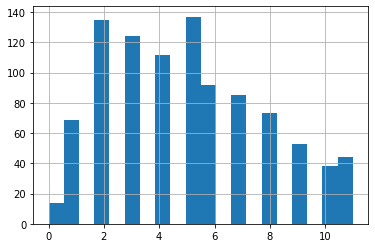

In [13]:
cars['Age'] = max(cars['Make_Year'])-cars['Make_Year'] #creating age 
cars['Age'].hist(bins=20)

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
cars['Price_arc'] = np.arcsinh(cars['Price']) #scaling numeric variables
cars['Age_arc'] = np.arcsinh(cars['Age'])
cars['Mileage_Run_arc'] = np.arcsinh(cars['Mileage_Run'])

<AxesSubplot:>

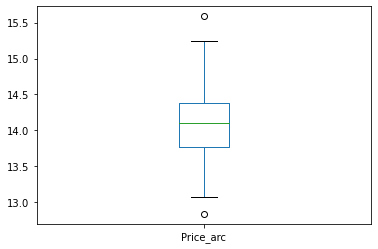

In [16]:
cars['Price_arc'].plot.box()

<AxesSubplot:>

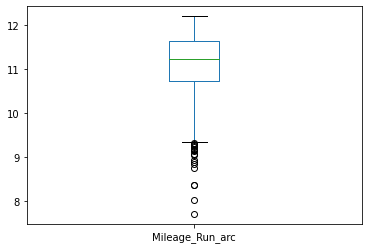

In [17]:
cars['Mileage_Run_arc'].plot.box()

<AxesSubplot:>

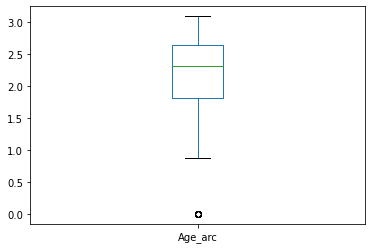

In [18]:
cars['Age_arc'].plot.box()

In [19]:
cars = cars.loc[cars['Price_arc']>13, :] #removing outliers 
cars = cars.loc[cars['Mileage_Run_arc']>9.5,:]
cars = cars.loc[cars['Age_arc']>0.5,:]

In [20]:
cars = cars.loc[cars['Price_arc']<15.2, :]

<AxesSubplot:>

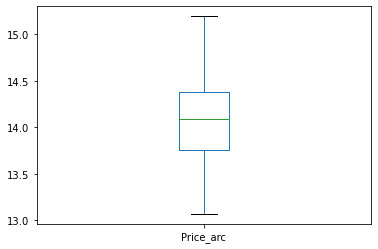

In [21]:
cars['Price_arc'].plot.box()

<AxesSubplot:>

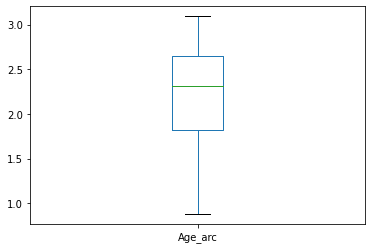

In [22]:
cars['Age_arc'].plot.box()

<AxesSubplot:>

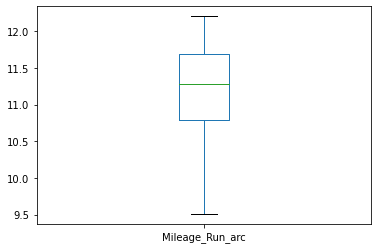

In [23]:
cars['Mileage_Run_arc'].plot.box()

2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [24]:
cars['Price_arc'].describe()

count    932.000000
mean      14.096271
std        0.444177
min       13.068963
25%       13.755229
50%       14.093899
75%       14.381108
max       15.193773
Name: Price_arc, dtype: float64

In [25]:
cars['Price'].describe()

count    9.320000e+02
mean     7.326631e+05
std      3.531352e+05
min      2.370000e+05
25%      4.707500e+05
50%      6.605000e+05
75%      8.802500e+05
max      1.984000e+06
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price_arc', ylabel='Density'>

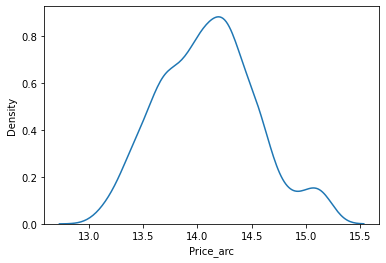

In [26]:
sns.kdeplot(data=cars, x="Price_arc")

In [27]:
cars.groupby('Make')['Price_arc'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,301.0,14.057468,0.398902,13.114331,13.782987,14.054527,14.329531,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,31.0,15.121998,0.063524,14.971763,15.080766,15.122762,15.185663,15.193773
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


The most expensive brand is G Motors. The second and third most expensive are Kia and Jeep, respectively. Overall,  the prices of the cars by make are relatively similar considering the standard deviation. The one with the most differences in price is Tata. 

  3. Split the data into an 80% training set and a 20% testing set.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
car_train, car_test = train_test_split(cars,test_size=.2,random_state=100)


4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

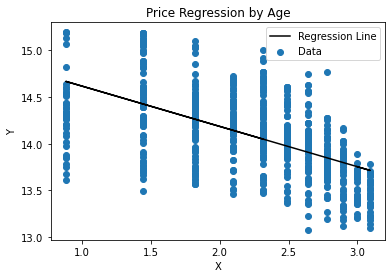

In [30]:
def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

x = car_train['Age_arc']
y = car_train['Price_arc']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.title('Price Regression by Age')

plt.show()

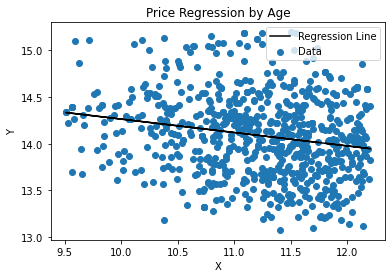

In [31]:
def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

x = car_train['Mileage_Run_arc']
y = car_train['Price_arc']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.title('Price Regression by Age')

plt.show()

In [32]:
numX = cars[['Age_arc', 'Mileage_Run_arc']]
numy = cars['Price_arc']

X_train, X_test, y_train, y_test = train_test_split(numX,numy,test_size=.2,random_state=100)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_hat = model.predict(X_test)

In [36]:
r_squared = r2_score(y_test, y_hat)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

In [38]:
print(r_squared)

0.373651359599231


In [39]:
print(rmse)

0.3609297322820265


The R sqaured is .37 and the rmse is .36 for the numeric model. 

In [40]:
X = cars[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']]
y = cars['Price_arc']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


In [41]:
dumbcat = pd.get_dummies(X_train)
dumbcat.head()

,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,Make_Maruti Suzuki,...,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
375,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
783,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
191,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
472,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
910,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [42]:
testcat = pd.get_dummies(X_test)
testcat.head()

,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,Make_Mahindra,Make_Maruti Suzuki,...,No_of_Owners_3rd,Fuel_Type_diesel,Fuel_Type_petrol,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
394,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
129,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
320,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
146,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
781,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1


In [43]:
catmodel = LinearRegression()
catmodel.fit(dumbcat, y_train)

LinearRegression()

In [44]:
#y_hat = catmodel.predict(testcat) #does not work bc not same amount of columns

In [45]:
print(testcat.columns)

Index(['Make_Chevrolet', 'Make_Datsun', 'Make_Ford', 'Make_Honda',
       'Make_Hyundai', 'Make_Jeep', 'Make_Kia', 'Make_MG Motors',
       'Make_Mahindra', 'Make_Maruti Suzuki', 'Make_Renault', 'Make_Skoda',
       'Make_Tata', 'Make_Toyota', 'Make_Volkswagen', 'Color_beige',
       'Color_black', 'Color_blue', 'Color_bronze', 'Color_brown',
       'Color_golden', 'Color_grey', 'Color_maroon', 'Color_orange',
       'Color_red', 'Color_silver', 'Color_white', 'Color_yellow',
       'Body_Type_crossover', 'Body_Type_hatchback', 'Body_Type_muv',
       'Body_Type_sedan', 'Body_Type_suv', 'No_of_Owners_1st',
       'No_of_Owners_2nd', 'No_of_Owners_3rd', 'Fuel_Type_diesel',
       'Fuel_Type_petrol', 'Transmission_4-Speed', 'Transmission_5-Speed',
       'Transmission_6-Speed', 'Transmission_7-Speed', 'Transmission_CVT',
       'Transmission_Type_Automatic', 'Transmission_Type_Manual'],
      dtype='object')


In [46]:
print(dumbcat.columns)

Index(['Make_Chevrolet', 'Make_Datsun', 'Make_Ford', 'Make_Honda',
       'Make_Hyundai', 'Make_Jeep', 'Make_Kia', 'Make_MG Motors',
       'Make_Mahindra', 'Make_Maruti Suzuki', 'Make_Nissan', 'Make_Renault',
       'Make_Skoda', 'Make_Tata', 'Make_Toyota', 'Make_Volkswagen',
       'Color_beige', 'Color_black', 'Color_blue', 'Color_bronze',
       'Color_brown', 'Color_golden', 'Color_green', 'Color_grey',
       'Color_maroon', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_silver', 'Color_white', 'Color_yellow', 'Body_Type_crossover',
       'Body_Type_hatchback', 'Body_Type_muv', 'Body_Type_sedan',
       'Body_Type_suv', 'No_of_Owners_1st', 'No_of_Owners_2nd',
       'No_of_Owners_3rd', 'Fuel_Type_diesel', 'Fuel_Type_petrol',
       'Fuel_Type_petrol+cng', 'Transmission_4-Speed', 'Transmission_5-Speed',
       'Transmission_6-Speed', 'Transmission_7-Speed', 'Transmission_CVT',
       'Transmission_Type_Automatic', 'Transmission_Type_Manual'],
      dtype='object')


In [47]:
different_columns = dumbcat[['Make_Nissan', 'Color_green', 'Color_purple', 'Fuel_Type_petrol+cng']]
print(different_columns)

     Make_Nissan  Color_green  Color_purple  Fuel_Type_petrol+cng
375            0            0             0                     0
783            0            0             0                     0
191            0            0             0                     0
472            0            0             0                     0
910            0            0             0                     0
..           ...          ...           ...                   ...
895            0            0             0                     0
912            0            0             0                     0
875            0            0             0                     0
830            0            0             0                     0
547            0            0             0                     0

[745 rows x 4 columns]


In [48]:
dumbcat = dumbcat.drop(columns = different_columns, errors='ignore') #dropping the columns they dont have in common

In [49]:
print(dumbcat.columns)

Index(['Make_Chevrolet', 'Make_Datsun', 'Make_Ford', 'Make_Honda',
       'Make_Hyundai', 'Make_Jeep', 'Make_Kia', 'Make_MG Motors',
       'Make_Mahindra', 'Make_Maruti Suzuki', 'Make_Renault', 'Make_Skoda',
       'Make_Tata', 'Make_Toyota', 'Make_Volkswagen', 'Color_beige',
       'Color_black', 'Color_blue', 'Color_bronze', 'Color_brown',
       'Color_golden', 'Color_grey', 'Color_maroon', 'Color_orange',
       'Color_red', 'Color_silver', 'Color_white', 'Color_yellow',
       'Body_Type_crossover', 'Body_Type_hatchback', 'Body_Type_muv',
       'Body_Type_sedan', 'Body_Type_suv', 'No_of_Owners_1st',
       'No_of_Owners_2nd', 'No_of_Owners_3rd', 'Fuel_Type_diesel',
       'Fuel_Type_petrol', 'Transmission_4-Speed', 'Transmission_5-Speed',
       'Transmission_6-Speed', 'Transmission_7-Speed', 'Transmission_CVT',
       'Transmission_Type_Automatic', 'Transmission_Type_Manual'],
      dtype='object')


In [50]:
catmodel = LinearRegression()
catmodel.fit(dumbcat, y_train)

LinearRegression()

In [51]:
y_hat = catmodel.predict(testcat)

In [52]:
r_squared = r2_score(y_test, y_hat)

In [53]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

In [54]:
print(r_squared, rmse)

0.7198022537032132 0.24140536006501942


R-Squared is .71 and rmse is .24. It looks like the numeric variables model is working better. 

In [55]:
numX = cars[['Age_arc', 'Mileage_Run_arc']]
numy = cars['Price_arc']

numX_train, numX_test, y_train, y_test = train_test_split(numX,numy,test_size=.2,random_state=100)

In [56]:
X1 = numX_train
X2 = dumbcat

In [57]:
trainX = pd.concat([X1,X2],axis=1) 
trainX.head()

,Age_arc,Mileage_Run_arc,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,...,No_of_Owners_3rd,Fuel_Type_diesel,Fuel_Type_petrol,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
375,2.312438,11.740937,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
783,1.443635,9.566615,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
191,1.818446,10.336438,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
472,2.312438,11.582694,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
910,2.312438,11.944422,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [58]:
X1 = numX_test
X2 = testcat

In [59]:
testX = pd.concat([X1,X2],axis=1) 
testX.head()

,Age_arc,Mileage_Run_arc,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,Make_MG Motors,...,No_of_Owners_3rd,Fuel_Type_diesel,Fuel_Type_petrol,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
394,1.443635,11.200431,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
129,2.094713,10.419898,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
320,2.312438,11.758801,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
146,1.818446,10.274982,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
781,0.881374,10.338058,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [60]:
jointmodel = LinearRegression()
jointmodel.fit(trainX, y_train)

LinearRegression()

In [61]:
y_hat = jointmodel.predict(testX)

In [62]:
r_squared = r2_score(y_test, y_hat)

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

In [64]:
print(r_squared, rmse)

0.8375722961309239 0.18379963405285848


so i definitely did something wrong with the categorical varibales because this model performs a lot worse. The numeric model is the winner, but this could be from error. 

Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the  𝑅2
  and RMSE change? At what point does  𝑅2
  go negative on the test set? For your best model with expanded features, what is the  𝑅2
  and RMSE? How does it compare to your best model from part 3?

In [65]:
from sklearn.preprocessing import PolynomialFeatures

Everytime I try to use get_feature_names_out it gives me the error of AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names_out'. I'm not sure why this is because my code should be using the latest version of sklearn which includes this function. I decided to move on without naming the columns 

In [66]:
numX = cars[['Age_arc', 'Mileage_Run_arc']]
numy = cars['Price_arc']

numX_train, numX_test, y_train, y_test = train_test_split(numX,numy,test_size=.2,random_state=100)

In [67]:
expander = PolynomialFeatures(degree=2, include_bias=False)

Z_train = expander.fit_transform(numX_train)
#names = expander.get_feature_names_out()
train_exnum2df = pd.DataFrame(data=Z_train)
train_exnum2df.head()

Z_test = expander.fit_transform(numX_test) 
#names = expander.get_feature_names_out() 
test_exnum2df = pd.DataFrame(data=Z_test)
test_exnum2df.head()

,0,1,2,3,4
0,1.443635,11.200431,2.084083,16.169340,125.449664
1,2.094713,10.419898,4.387821,21.826690,108.574265
2,2.312438,11.758801,5.347371,27.191502,138.269394
3,1.818446,10.274982,3.306748,18.684505,105.575258
4,0.881374,10.338058,0.776819,9.111692,106.875449


In [68]:
reg = LinearRegression().fit(train_exnum2df, y_train) 
print(reg.score(test_exnum2df, y_test))

0.4346869121350184


In [69]:
y_hat2 = reg.predict(test_exnum2df)

In [70]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat2))
print(rmse)

0.3428933873854352


When the numeric variables are expanded by 2, r-squared is .43 and rmse is .34

In [71]:
expander = PolynomialFeatures(degree=3, include_bias=False)

Z_train = expander.fit_transform(numX_train)
#names = expander.get_feature_names_out()
train_exnum3df = pd.DataFrame(data=Z_train)
train_exnum3df.head()

Z_test = expander.fit_transform(numX_test) 
#names = expander.get_feature_names_out() 
test_exnum3df = pd.DataFrame(data=Z_test)
test_exnum3df.head()

,0,1,2,3,4,5,6,7,8
0,1.443635,11.200431,2.084083,16.169340,125.449664,3.008657,23.342633,181.103586,1405.090366
1,2.094713,10.419898,4.387821,21.826690,108.574265,9.191223,45.720642,227.431875,1131.332719
2,2.312438,11.758801,5.347371,27.191502,138.269394,12.365466,62.878671,319.739447,1625.882239
3,1.818446,10.274982,3.306748,18.684505,105.575258,6.013143,33.976772,191.982954,1084.783891
4,0.881374,10.338058,0.776819,9.111692,106.875449,0.684668,8.030804,94.197198,1104.884623


In [72]:
reg2 = LinearRegression().fit(train_exnum3df, y_train) 
print(reg2.score(test_exnum3df, y_test))

0.44228890784020025


In [73]:
y_hat3 = reg2.predict(test_exnum3df)

In [74]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat3))
print(rmse)

0.3405800704039461


r squared and rmse dont change much. Lets see if a much higher degree will change them 

In [75]:
expander = PolynomialFeatures(degree=8, include_bias=False)

Z_train = expander.fit_transform(numX_train)
#names = expander.get_feature_names_out()
train_exnum8df = pd.DataFrame(data=Z_train)
train_exnum8df.head()

Z_test = expander.fit_transform(numX_test) 
#names = expander.get_feature_names_out() 
test_exnum8df = pd.DataFrame(data=Z_test)
test_exnum8df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.443635,11.200431,2.084083,16.169340,125.449664,3.008657,23.342633,181.103586,1405.090366,4.343404,...,2.211278e+07,18.865154,146.365113,1135.572268,8810.326116,68354.827323,5.303302e+05,4.114562e+06,3.192279e+07,2.476726e+08
1,2.094713,10.419898,4.387821,21.826690,108.574265,9.191223,45.720642,227.431875,1131.332719,19.252970,...,1.333657e+07,370.676858,1843.887788,9172.199728,45626.012815,226961.155134,1.128991e+06,5.616032e+06,2.793628e+07,1.389657e+08
2,2.312438,11.758801,5.347371,27.191502,138.269394,12.365466,62.878671,319.739447,1625.882239,28.594377,...,3.108431e+07,817.638424,4157.709673,21142.046674,107507.780181,546679.466638,2.779877e+06,1.413574e+07,7.188055e+07,3.655142e+08
3,1.818446,10.274982,3.306748,18.684505,105.575258,6.013143,33.976772,191.982954,1084.783891,10.934579,...,1.209115e+07,119.565022,675.592323,3817.378850,21569.785197,121878.297040,6.886633e+05,3.891235e+06,2.198710e+07,1.242363e+08
4,0.881374,10.338058,0.776819,9.111692,106.875449,0.684668,8.030804,94.197198,1104.884623,0.603448,...,1.262039e+07,0.364150,4.271291,50.100048,587.647762,6892.805622,8.084906e+04,9.483178e+05,1.112328e+07,1.304703e+08


In [76]:
reg3 = LinearRegression().fit(train_exnum8df, y_train) 
print(reg3.score(test_exnum8df, y_test))

0.40629361866112634


In [77]:
y_hat8 = reg3.predict(test_exnum8df)

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat8))
print(rmse)

0.35139894096197305


The best expanded model is the one by 2 degrees, but it is a very small change when I increase the degrees. The R sqaured for the expanded model is slightly higher than the original model (.43 vs.37) the rmse is slightly better for the expanded model (.34 vs .36). 

For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [79]:
numX = cars[['Age_arc', 'Mileage_Run_arc']]
numy = cars['Price_arc']

X_train, X_test, y_train, y_test = train_test_split(numX,numy,test_size=.2,random_state=100)

In [80]:
reg = LinearRegression().fit(X_train, y_train) 

In [81]:
y_hat = reg.predict(X_test)

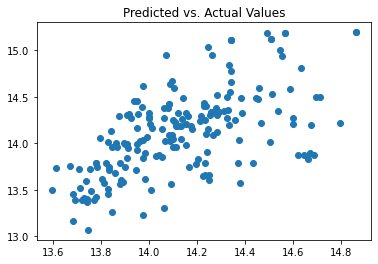

In [82]:
plt.scatter(x=y_hat,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

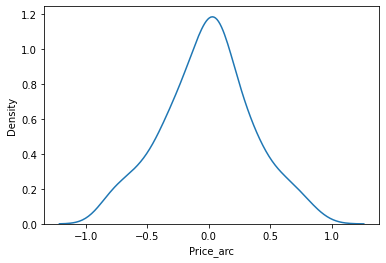

In [83]:
residuals = y_test - y_hat
sns.kdeplot(residuals)
plt.show()

The predicted vs actual values  roughly line up across the diagonal and the residuals create a bell curve at 0. This is an okay model, but it gets worse at predictions as the values rise. 

Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the max_depth option (i.e. tree.DecisionTreeRegressor(max_depth=D)), and compute the  𝑅2
and RMSE on the test set of a variety of depths. What depth tree gives the best results?

In [84]:
from sklearn import tree 

In [85]:
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

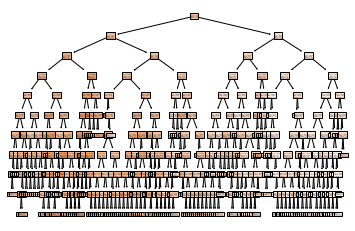

In [86]:
model = tree.DecisionTreeRegressor(max_depth=10)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [87]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 0.41321010988533674 R2: 0.18241629280777139


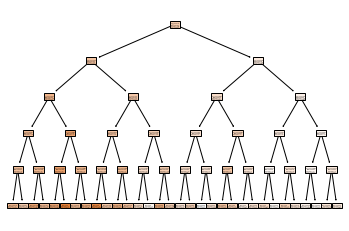

In [88]:
model = tree.DecisionTreeRegressor(max_depth=5)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [89]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 0.3547017689695129 R2: 0.3975554781792987


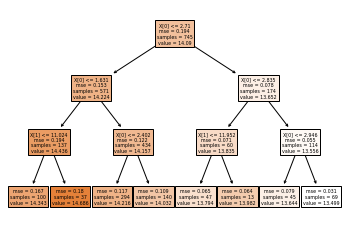

In [90]:
model = tree.DecisionTreeRegressor(max_depth=3)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [91]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 0.3489154622188387 R2: 0.41705070402043265


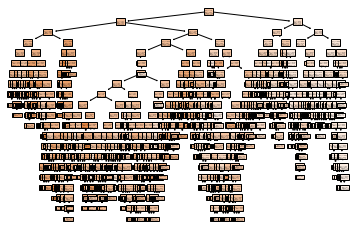

In [92]:
model = tree.DecisionTreeRegressor(max_depth=20)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [93]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 0.4686994427802224 R2: -0.05191155366677602


It looks like the lower the depth, the better the model is. The model with the depth of 3 has the lowest rmse and highest r2. 

For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

[Text(167.4, 190.26, 'X[0] <= 2.71\nmse = 0.194\nsamples = 745\nvalue = 14.09'),
 Text(83.7, 135.9, 'X[0] <= 1.631\nmse = 0.153\nsamples = 571\nvalue = 14.224'),
 Text(41.85, 81.53999999999999, 'X[1] <= 11.024\nmse = 0.194\nsamples = 137\nvalue = 14.436'),
 Text(20.925, 27.180000000000007, 'mse = 0.167\nsamples = 100\nvalue = 14.343'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 0.18\nsamples = 37\nvalue = 14.686'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 2.402\nmse = 0.122\nsamples = 434\nvalue = 14.157'),
 Text(104.625, 27.180000000000007, 'mse = 0.117\nsamples = 294\nvalue = 14.216'),
 Text(146.475, 27.180000000000007, 'mse = 0.109\nsamples = 140\nvalue = 14.032'),
 Text(251.10000000000002, 135.9, 'X[0] <= 2.835\nmse = 0.078\nsamples = 174\nvalue = 13.652'),
 Text(209.25, 81.53999999999999, 'X[1] <= 11.952\nmse = 0.071\nsamples = 60\nvalue = 13.835'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 0.065\nsamples = 47\nvalue = 13.794'),
 Text(230.175, 27.

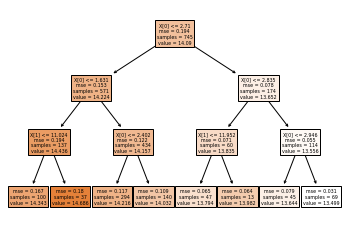

In [94]:
model = tree.DecisionTreeRegressor(max_depth=3)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 

In [95]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 0.3489154622188387 R2: 0.41705070402043265


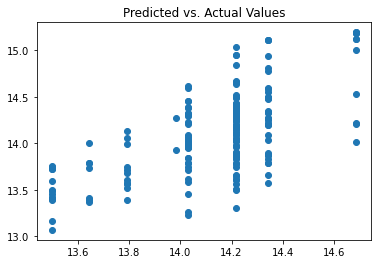

In [96]:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

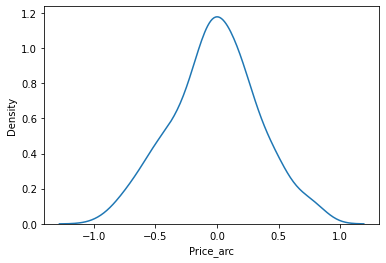

In [97]:
residuals = y_test - y_hat_cart
sns.kdeplot(residuals)
plt.show()

Bell curve looks good, and the predicted vs actual looks okay. There is a trend along the diagonal, but the values are kind of spread out. This model is fine, but there's room for improvement. 

The R sqaured is .37 and the rmse is .36 for the linear model of numeric variables. For the decision tree, R2 is 0.42 and RMSE is .35. The decision tree performs slightly better. 

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

In [98]:
wages = pd.read_csv('wages_hw.csv')

<AxesSubplot:>

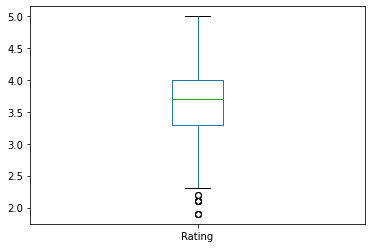

In [99]:
wages['Rating'].plot.box()

In [100]:
wages = wages.loc[wages['Rating']>2.4,:]

<AxesSubplot:>

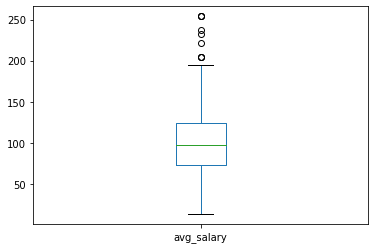

In [101]:
wages['avg_salary'].plot.box()

In [102]:
wages = wages.loc[wages['avg_salary']<190,:]

In [103]:
wages['Sector'].unique().tolist()

['Aerospace & Defense',
 'Health Care',
 'Business Services',
 'Oil, Gas, Energy & Utilities',
 'Real Estate',
 'Finance',
 'Information Technology',
 'Retail',
 'Biotech & Pharmaceuticals',
 'Media',
 'Insurance',
 'Transportation & Logistics',
 'Telecommunications',
 '-1',
 'Manufacturing',
 'Mining & Metals',
 'Government',
 'Education',
 'Agriculture & Forestry',
 'Travel & Tourism',
 'Non-Profit',
 'Arts, Entertainment & Recreation',
 'Construction, Repair & Maintenance',
 'Accounting & Legal',
 'Consumer Services']

In [104]:
wages['Sector'] = wages['Sector'].replace('-1', np.nan)
wages = wages[wages['Sector'].notnull()]

In [105]:
wages['Size'].unique().tolist()

['501 to 1000 employees',
 '10000+ employees',
 '1001 to 5000 employees',
 '51 to 200 employees',
 '201 to 500 employees',
 '5001 to 10000 employees',
 'Unknown',
 '1 to 50 employees']

In [106]:
wages['Size'] = wages['Size'].replace('Unknown', np.nan)
wages = wages[wages['Size'].notnull()]

In [107]:
wages['job_state'].unique().tolist()

[' NM',
 ' MD',
 ' FL',
 ' WA',
 ' NY',
 ' TX',
 ' CA',
 ' VA',
 ' MA',
 ' NJ',
 ' CO',
 ' IL',
 ' KY',
 ' OR',
 ' CT',
 ' MI',
 ' OH',
 ' AL',
 ' MO',
 ' PA',
 ' GA',
 ' IN',
 ' LA',
 ' WI',
 ' NC',
 ' AZ',
 ' NE',
 ' MN',
 ' DC',
 ' Los Angeles',
 ' UT',
 ' TN',
 ' DE',
 ' ID',
 ' RI',
 ' IA',
 ' SC',
 ' KS']

In [108]:
wages['job_state'] = wages['job_state'].replace([' Los Angeles'], ' CA')

In [109]:
X = wages[['job_state', 'Size', 'Sector', 'Rating']]
y = wages['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


 Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 

In [110]:
X1 = wages['Sector']
y1 = wages['avg_salary']
X1 = pd.get_dummies(X1)

X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=.2,random_state=100)


In [111]:
X_train.head()

,Accounting & Legal,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,...,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
157,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [112]:
X_test.head()

,Accounting & Legal,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,...,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:
y_hat = model.predict(X_test)

In [115]:
r_squared = r2_score(y_test, y_hat)

In [116]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

In [117]:
print('R^2:', r_squared, 'RMSE:', rmse)

R^2: -1.3380311215432091e+25 RMSE: 135659657608958.28


In [118]:
wages.groupby('Sector')['avg_salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Sector,,,,,,,,
Accounting & Legal,1.0,113.500000,NaN,113.5,113.500,113.50,113.500,113.5
Aerospace & Defense,25.0,99.060000,29.567832,59.0,86.500,100.50,109.500,173.0
Agriculture & Forestry,1.0,80.500000,NaN,80.5,80.500,80.50,80.500,80.5
"Arts, Entertainment & Recreation",4.0,48.500000,0.000000,48.5,48.500,48.50,48.500,48.5
Biotech & Pharmaceuticals,102.0,114.102941,33.060276,37.0,84.000,113.50,140.375,174.0
Business Services,94.0,96.462766,32.198163,15.5,71.500,93.50,119.500,179.5
"Construction, Repair & Maintenance",3.0,26.500000,0.000000,26.5,26.500,26.50,26.500,26.5
Consumer Services,4.0,99.875000,30.537886,65.0,89.375,97.50,108.000,139.5
Education,23.0,100.739130,27.954049,59.5,74.500,105.50,122.500,169.0


Media, Biotech & Pharmaceuticals, and Accounting & Legal have the highest predicted salaries. 

Make a scatterplot of avg_salary and Rating. Is there an obvious visual relationship between the two variables? Regress avg_salary on Rating as a numeric variable: Do higher ratings predict higher or lower wages? Convert Rating to a one-hot encoded variable, with a category for each rating. Run a regression of avg_salary on the categorical version. How do your results change? Explain. Which version has a higher  𝑅2
  and lower RMSE?

In [119]:
X = wages['avg_salary']
y = wages['Rating']

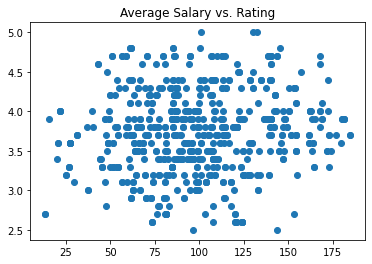

In [120]:
plt.scatter(x=X,y=y)
plt.title('Average Salary vs. Rating')
plt.show()

In [121]:
X = np.arcsinh(wages['Rating'])
y = np.arcsinh(wages['avg_salary'])


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)


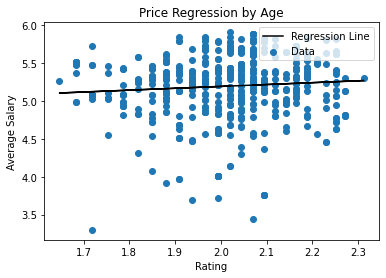

0.006435410263980423 0.4187363932751204


In [123]:
def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

def calculate_r2(y, y_hat):
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_hat)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def calculate_rmse(y, y_hat):
    rmse = np.sqrt(np.mean((y_hat - y)**2))
    return rmse

x = X_train
y = y_train

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Rating")
plt.ylabel("Average Salary")
plt.legend(loc='upper right')
plt.title('Price Regression by Age')

plt.show()

r2 = calculate_r2(y, y_hat)
rmse = calculate_rmse(y, y_hat)

print(r2, rmse)

In [124]:
dumrate = pd.get_dummies(wages['Rating'])


In [125]:
dumrate.head()

,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X = dumrate
y = np.arcsinh(wages['avg_salary'])

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [128]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [129]:
y_hat = model.predict(X_test)

In [130]:
r_squared = r2_score(y_test, y_hat)

In [131]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

In [132]:
print(r_squared, rmse)

-0.06466691171982553 0.45652873618226375


It works better with numerical prediction as opposed to categorical. 

Now interact Sector with the categorical version of Rating, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the .PolynomialFeatures() function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts Sector and Rating and then one-hot encoding the result. Regress avg_salary on the (Sector, Rating) pairs. How does the  𝑅2
  and RMSE on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?

In [133]:
dumbrate = pd.get_dummies(wages['Rating'])
dumbsector = pd.get_dummies(wages['Sector'])

In [134]:
X = pd.concat([dumbrate,dumbsector],axis=1)

In [135]:
X.head()

,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,...,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
y = np.arcsinh(wages['avg_salary'])

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [138]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
y_hat = model.predict(X_test)

In [140]:
r_squared = r2_score(y_test, y_hat)

In [141]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

In [142]:
print(r_squared, rmse)

-1.921524315844674e+24 613315842648.2771


The model in part 2 performs better than this one. 

Run a linear regression of avg_salary on all the variables. What is the  𝑅2
  on the test set? How does it compare to your simpler models in 2--4?

In [143]:
dumbstate = pd.get_dummies(wages['job_state'])
dumbsize = pd.get_dummies(wages['Size'])

In [144]:
X = pd.concat([dumbrate,dumbsector, dumbstate, dumbsize],axis=1)
y = wages['avg_salary']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [146]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [147]:
y_hat = model.predict(X_test)

In [148]:
r_squared = r2_score(y_test, y_hat)

In [149]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

In [150]:
print(r_squared, rmse)

-1.6887039437054863e+26 481941547659387.6


Build a decision tree by regressing avg_salary on Sector, Rating, and the (Sector, Rating) pairs. What are the  𝑅2
  and RMSE of your models on the test set? How do your answers compare to parts 2, 3, and 4?

In [151]:
X = dumbsector
y = wages['avg_salary']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [153]:
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

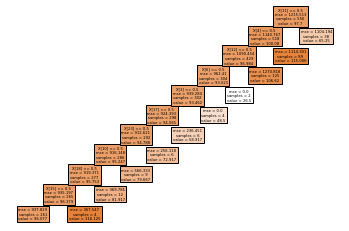

In [154]:
model = tree.DecisionTreeRegressor(max_depth=10)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [155]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 34.23762898711594 R2: 0.15255932715234755


In [156]:
X = dumbrate
y = wages['avg_salary']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

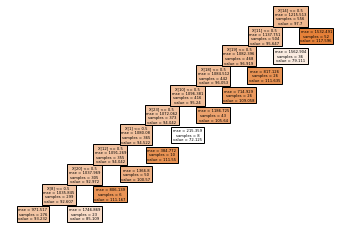

In [158]:
model = tree.DecisionTreeRegressor(max_depth=10)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [159]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 39.19731722523318 R2: -0.11074566928902452


In [160]:
X = pd.concat([dumbrate,dumbsector],axis=1)
y = wages['avg_salary']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

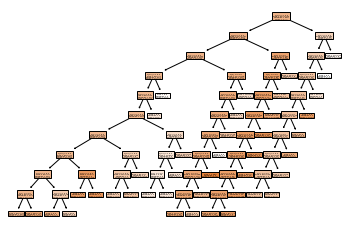

In [162]:
model = tree.DecisionTreeRegressor(max_depth=10)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [163]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 34.3697202821972 R2: 0.14600773612297757


The decision tree is working better than the other linear models. My r2 is not negative. 

Build a decision tree by regressing avg_salary on all the other variables. What is the  𝑅2
  and RMSE on the test set?

In [164]:
X = pd.concat([dumbrate,dumbsector, dumbstate, dumbsize],axis=1)
y = wages['avg_salary']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

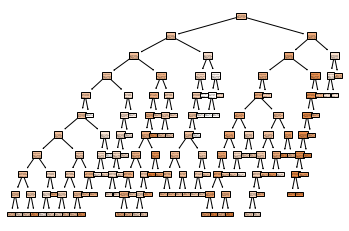

In [166]:
model = tree.DecisionTreeRegressor(max_depth=10)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [167]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 34.3174055707491 R2: 0.1486055086500787


Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the  𝑅2
  and RMSE of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

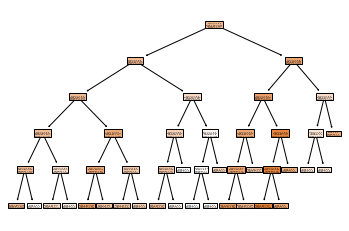

In [168]:
model = tree.DecisionTreeRegressor(max_depth=5)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [169]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 34.25171718746787 R2: 0.15186176890030423


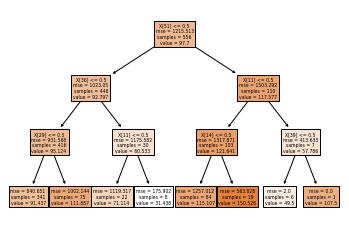

In [170]:
model = tree.DecisionTreeRegressor(max_depth=3)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [171]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 34.64695448788741 R2: 0.13217516902033888


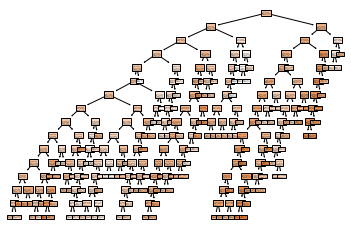

In [172]:
model = tree.DecisionTreeRegressor(max_depth=15)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

In [173]:
y_hat_cart = model.predict(X_test)
residuals_cart = y_test - y_hat_cart

SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print("RMSE:", RMSE_cart,"R2:", R2_cart )

RMSE: 32.23275941264344 R2: 0.24890146581124428


The decision tree model works better with more degrees of freedom. I

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?